In [3]:
#TSL SENSITIVITY
import pandas as pd
from hydra import initialize, compose
from infer_lstm import infer_lstm
with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config",overrides=['model=lstm'])

inferences = []
# Run the other script
final_input = pd.read_csv(f'{cfg.data}/observed_timeseries30_data.csv')
for x in range(-10,11,1):
    inferences.append(infer_lstm(final_input,cfg,tsl_offset=x/2))




/Users/gclyne/thesis/env/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/gclyne/thesis/env/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/gclyne/thesis/env/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.2 when using version 1.2.0. This might lead to breaking code or invali

In [2]:
i_copy = inferences.copy()

<AxesSubplot:xlabel='lat'>

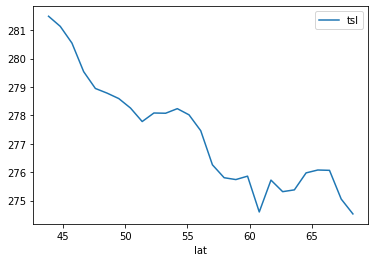

In [23]:
final_input[final_input['year'] == 2014].groupby('lat').mean().plot(y='tsl')

In [4]:
from preprocessing.utils import getArea
for i in range(len(inferences)):
    inferences[i]['area'] =     inferences[i].apply(lambda x: getArea(x['lat'],x['lon']),axis=1)
    inferences[i]['cSoilAbove1m'] = inferences[i]['cSoilAbove1m'] * inferences[i]['area'] / 1e9

/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_93916/4094408919.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels([x for x in range(-5,6,2)])


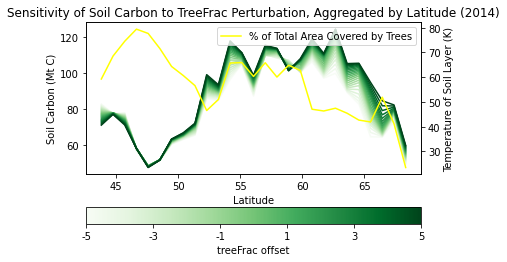

In [39]:
import matplotlib.pyplot as plt
import numpy as np
f,ax = plt.subplots()
plt.gca().set_prop_cycle(plt.cycler('color',plt.cm.Greens(np.linspace(0, 1, len(inferences)))))
# plt.cm.set_cmap('Greens')
for inference_index in range(len(inferences)):
    inference_2014 = inferences[inference_index][inferences[inference_index]['year'] == 2014]
    ax.plot(inference_2014.groupby('lat').mean()['cSoilAbove1m'],label='cSoilAbove1m')
# plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Soil Carbon (Mt C)')
plt.title('Sensitivity of Soil Carbon to TreeFrac Perturbation, Aggregated by Latitude (2014)')
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Greens),ax=ax,  label='treeFrac offset',location='bottom')
# cbar.spacing
# cbar.ax.set_yticks([x for x in range(-10,11,4)])
cbar.ax.set_xticklabels([x for x in range(-5,6,2)])
ax2 = ax.twinx()
# ax.legend(
ax2.plot(final_input[final_input['year'] == 2014].groupby('lat').mean()['treeFrac'],color='yellow',label='% of Total Area Covered by Trees')
ax2.set_ylabel('Temperature of Soil Layer (K)')
plt.legend()
# plt.plot(final_input.groupby('lat').mean()['tsl'])
plt.show()


# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_93916/1171981707.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([x for x in range(-5,6,2)])


[Text(1, 0.0, '-5'),
 Text(1, 0.2, '-3'),
 Text(1, 0.4, '-1'),
 Text(1, 0.6000000000000001, '1'),
 Text(1, 0.8, '3'),
 Text(1, 1.0, '5')]

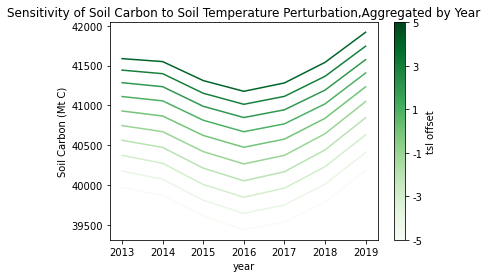

In [6]:
f,ax = plt.subplots()
plt.gca().set_prop_cycle(plt.cycler('color',plt.cm.Greens(np.linspace(0, 1, 11))))
# plt.cm.set_cmap('Greens')
for inference_index in range(5,15,1):
    # inference_2014 = inferences[inference_index][inferences[inference_index]['year'] == 2014]
    ax.plot(inferences[inference_index].groupby('year').sum()['cSoilAbove1m'],label = inference_index-5)
# plt.legend()
plt.xlabel('year')
plt.ylabel('Soil Carbon (Mt C)')
plt.title('Sensitivity of Soil Carbon to Soil Temperature Perturbation,Aggregated by Year')

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Greens),ax=ax, orientation='vertical', label='tsl offset')
# cbar.ax.set_yticks([x for x in range(-10,11,4)])
cbar.ax.set_yticklabels([x for x in range(-5,6,2)])

In [ ]:
import pandas as pd
from hydra import initialize, compose
from infer_lstm import infer_lstm
with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config",overrides=['model=lstm'])

inferences = []
# Run the other script
inferences.append(infer_lstm(cfg,tsl_offset=0))

In [ ]:
inferences[0].to_csv('data/forest_carbon_observed_lstm.csv')
# inferred = pd.read_csv('data/forest_carbon_observed_lstm.csv')
inferred = inferences[0]


In [ ]:
from preprocessing.utils import getArea

inferred['area'] = inferred.apply(lambda x: getArea(x['lat'],x['lon']),axis=1)
inferred['cSoilAbove1m'] = inferred['cSoilAbove1m'] * inferred['area'] / 1e9
inferred = inferred.groupby('year').sum()
